<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/pytorch_linear_regression_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Model_0 - Used `nn.Parameter()` and manual test data creating

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1.1 Create data

In [ ]:
weight = 0.7
bias = 0.3
start, end , step = 0, 1, 0.002

X = torch.arange(start, end, step)
y = weight * X + bias

len(X), len(y), X[:5], y[:5]

(500,
 500,
 tensor([0.0000, 0.0020, 0.0040, 0.0060, 0.0080]),
 tensor([0.3000, 0.3014, 0.3028, 0.3042, 0.3056]))

## 1.2 Split training and test data

In [ ]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

## 1.3 Create linear regression model

In [ ]:
class LinearRegressionModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)
    self.bias = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)

  def forward(self, x):
    return self.weight * x + self.bias

## 1.4 Create model_0

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModelV0()
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

## 1.5 Create loss function and optimizer

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.00001)

## 1.6 Create train and test loop

In [ ]:
epochs = 500

for epoch in range(epochs):
  ## Train
  model_0.train()

  # 1. Forward pass
  train_preds = model_0(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. optimize step
  optimizer.step()

  ## Test
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

model_0.state_dict()

Epoch: 0 | Train Loss: 0.6877 | Test Loss: 0.7789
Epoch: 20 | Train Loss: 0.6875 | Test Loss: 0.7786
Epoch: 40 | Train Loss: 0.6873 | Test Loss: 0.7783
Epoch: 60 | Train Loss: 0.6870 | Test Loss: 0.7780
Epoch: 80 | Train Loss: 0.6868 | Test Loss: 0.7778
Epoch: 100 | Train Loss: 0.6866 | Test Loss: 0.7775
Epoch: 120 | Train Loss: 0.6863 | Test Loss: 0.7772
Epoch: 140 | Train Loss: 0.6861 | Test Loss: 0.7769
Epoch: 160 | Train Loss: 0.6859 | Test Loss: 0.7767
Epoch: 180 | Train Loss: 0.6856 | Test Loss: 0.7764
Epoch: 200 | Train Loss: 0.6854 | Test Loss: 0.7761
Epoch: 220 | Train Loss: 0.6852 | Test Loss: 0.7759
Epoch: 240 | Train Loss: 0.6849 | Test Loss: 0.7756
Epoch: 260 | Train Loss: 0.6847 | Test Loss: 0.7753
Epoch: 280 | Train Loss: 0.6845 | Test Loss: 0.7750
Epoch: 300 | Train Loss: 0.6842 | Test Loss: 0.7748
Epoch: 320 | Train Loss: 0.6840 | Test Loss: 0.7745
Epoch: 340 | Train Loss: 0.6838 | Test Loss: 0.7742
Epoch: 360 | Train Loss: 0.6836 | Test Loss: 0.7740
Epoch: 380 | Train

OrderedDict([('weight', tensor([0.8803])), ('bias', tensor([0.9100]))])

# 2. Model_1 - Used `nn.Linear()` and used `make_regression()` to create test data

In [ ]:
import torch
from torch import nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2.1 Create data using make_regression

In [ ]:
samples = 1000
features = 1

X, y = make_regression(n_samples = samples,
                       n_features = 1,
                       n_targets = 1,
                       random_state = 42)
len(X), len(y), X[0], y[0]

(1000, 1000, array([-1.20029641]), np.float64(-20.102874172998494))

## 2.2 Split training and test data

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float).unsqueeze(dim = 1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

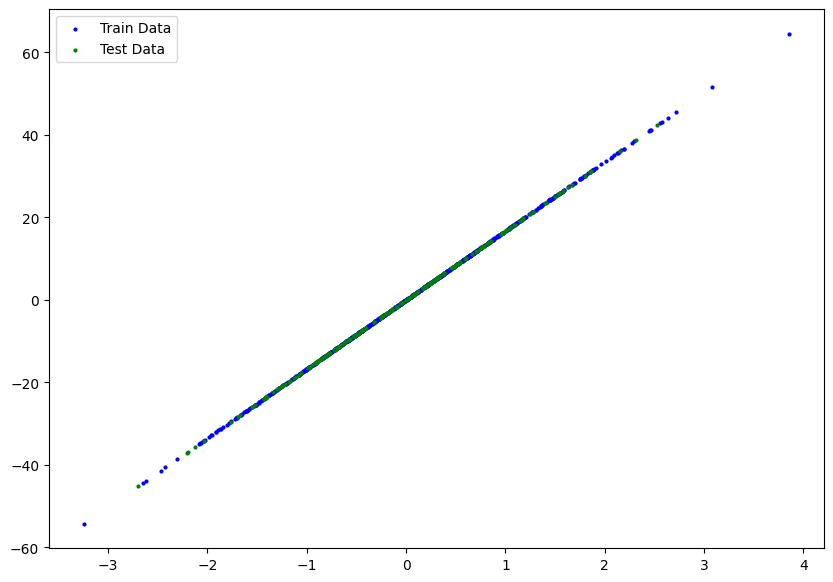

In [ ]:
def plot_data(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              preds = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Train Data')
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test Data')
  if preds is not None:
    plt.scatter(test_data, preds, c = 'r', s = 4, label = 'Predications')
  plt.legend(prop = {'size': 10})

plot_data()

## 2.3 Create linear regression model

In [ ]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    return self.linear_layer(x)

## 2.4 Create model_0

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV1()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## 2.5 Create loss function and optimizer

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.00001)

## 2.6 Create train and test loop

In [ ]:
epochs = 500

for epoch in range(epochs):
  ## Train
  model_1.train()

  # 1. Forward pass
  train_preds = model_1(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Test
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_1(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.00005 | Test Loss: 0.00004
Epoch: 50 | Train Loss: 0.00001 | Test Loss: 0.00001
Epoch: 100 | Train Loss: 0.00000 | Test Loss: 0.00001
Epoch: 150 | Train Loss: 0.00000 | Test Loss: 0.00001
Epoch: 200 | Train Loss: 0.00000 | Test Loss: 0.00001
Epoch: 250 | Train Loss: 0.00000 | Test Loss: 0.00001
Epoch: 300 | Train Loss: 0.00000 | Test Loss: 0.00001
Epoch: 350 | Train Loss: 0.00000 | Test Loss: 0.00001
Epoch: 400 | Train Loss: 0.00000 | Test Loss: 0.00001
Epoch: 450 | Train Loss: 0.00000 | Test Loss: 0.00001


## 2.7 Compare model

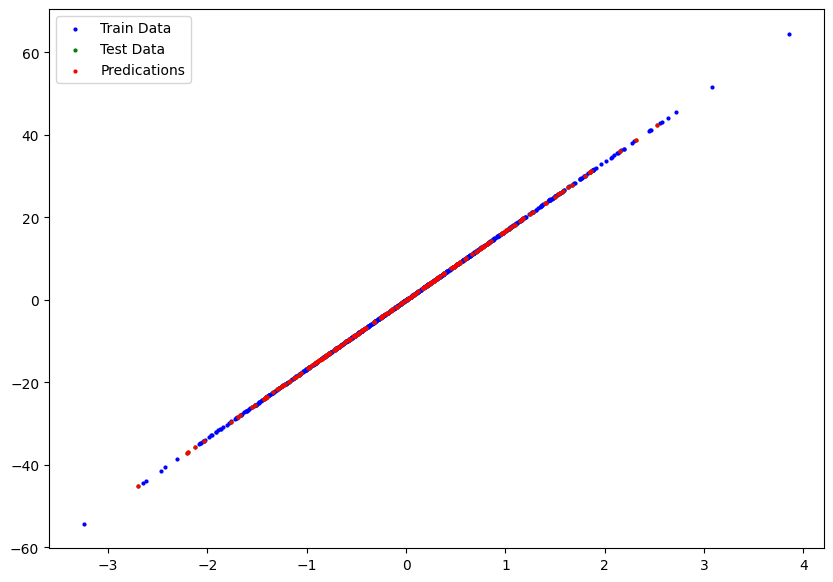

In [ ]:
model_1.eval()
with torch.inference_mode():
  test_preds = model_1(X_test)

plot_data(preds = test_preds)

# 3. Modlel_2 - Createing test data with 2 features